In [1]:
import pandas as pd
import glob

import csv
import matplotlib.pyplot as plt


In [2]:
import os
current_directory = os.getcwd()
print("Current directory : ", current_directory)

aymeric =  "/home/aymeric/python-scripts/anses_medialab/datas/" #aymeric
jp = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
jp_index = '~/Dropbox/Mac/Desktop/CRD Anses/code/indexation_results/' # Jean Philippe index

if 'aymeric' in current_directory:
    path_base = aymeric

elif 'Mac' in current_directory:
    path_base = jp
elif 'd:/Projects' in current_directory:
    path_base = "d:/Projects/Medialab/"

print("Path base : ", path_base)

Current directory :  /home/aymeric/python-scripts/anses_medialab/industries
Path base :  /home/aymeric/python-scripts/anses_medialab/datas/


In [3]:
import glob
tweet_path = f"{path_base}tweets_pesticides/tweets_pesticides and cie/"
paths=glob.glob(tweet_path)
paths
i=-1
dic_id={}
for x in [x for x in pd.read_csv(glob.glob(f'{tweet_path}*.csv')[0]).columns if 'id' in x]:
    dic_id[x]=str
dic_id
for name in glob.glob(f'{tweet_path}*.csv'):
    print (name)
    i+=1
    df0=pd.read_csv(name, dtype=dic_id, usecols=['id','user_id', 'text', 'user_screen_name', 'to_userid',
       'to_tweetid','mentioned_names', 'mentioned_ids','local_time'])
    
    if i>0:
        df=pd.concat([df,df0])
    else:
        df=df0


/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_mars-10sept.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_2015.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_2019.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_janv-fevrier.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_2017.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_2019_jan-6fev.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_2018-16Sept.csv
/home/aymeric/python-scripts/anses_medialab/datas/tweets_pesticides/tweets_pesticides and cie/tweets_pesticides_2016.csv
/

In [4]:

tweets= df.drop_duplicates()
tweets['local_time'] = pd.to_datetime(tweets['local_time'])
#tweets


print (len(tweets))

1351278


/tmp/ipykernel_10006/620171187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['local_time'] = pd.to_datetime(tweets['local_time'])


In [5]:
tweets.loc[tweets.user_id=="1125791906548592642"]

,id,local_time,user_screen_name,text,to_userid,to_tweetid,user_id,mentioned_names,mentioned_ids


In [6]:
# Using '*' pattern 
#print('\nNamed with wildcard *:')
i=-1
dic_id={}
for x in [x for x in pd.read_csv(f"{path_base}data_for_industry/20250902_pesticides_industries.csv").columns if 'id' in x]:
    dic_id[x]=str
dic_id
users0 = pd.read_csv(f"{path_base}data_for_industry/20250902_pesticides_industries.csv", sep =",", dtype=dic_id)

dict_col = {}
for x in ['field_work_x', 'metier_x', 'Ingenieur_x', 'Agronome_x',
       'industry_verif_x', 'field_work_y', 'metier_y', 'Ingenieur_y',
       'Agronome_y', 'industry_verif_y']:
    dict_col[x] = x.replace("_x","").replace('_y',"")
dict_col
users0 = users0[['user_id', 'user_screen_name', 'user_description',
       'account_publication', 'industry', 'Type_entite', 'company', 'UIPP',
       'field_work_x', 'metier_x', 'Ingenieur_x', 'Agronome_x',
       'industry_verif_x']].rename(columns=dict_col)
users0

,user_id,user_screen_name,user_description,account_publication,industry,Type_entite,company,UIPP,field_work,metier,Ingenieur,Agronome,industry_verif
0,813449923115057152,j_saintraymond,Ingénieur agri ISAB 144 directeur de l'associ...,379,False,Personne,NaN,False,NaN,NaN,NaN,NaN,NaN
1,1123871932401770496,gm68492268,@bayer crop science. @fdpint views my own. Bru...,10,True,Personne,bayer,False,Recherche et développement,Recherche et développement,False,True,True
2,2850538847,placroix1979,#agronome @BASF_Agro_FR #agriculture #agroecol...,88,True,Personne,basf,False,Affaires publiques et régulation,Affaires publiques et régulation,False,True,True
3,877098328344973312,LCJAMET,:Ingénieur Agronome @BASF_Agro_FR Mes propos n...,238,True,Personne,basf,False,Marketing,Marketing,True,True,True
4,707042635,petatJM,agronome progressiste/humaniste engagé dans l'...,300,True,Personne,basf,False,Affaires publiques et régulation,Affaires publiques et régulation,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1100128626396327937,Jennifer_17_85,ITT chez #PioneerSemences #CortevaFR agricultr...,3,True,Personne,corteva agriscience,False,NaN,NaN,False,True,True
197,803999368915415040,ShuyouHan,Generic pesticide business in Canada & US; Pes...,1,True,Personne,NaN,False,NaN,NaN,NaN,NaN,NaN
198,545922401,Dormionq,Commercial semences maïs tournesol et colza c...,1,True,Personne,syngenta,False,Relations commerciales,Relations commerciales,False,False,True
199,1112708474994126850,BerardierK,ingénieur #ESA / ingénieur technico-commercial...,1,True,Personne,NaN,False,NaN,NaN,NaN,NaN,NaN


In [7]:
# Using '*' pattern 
#print('\nNamed with wildcard *:')
i=-1
dic_id={}
for x in [x for x in pd.read_csv(f'{path_base}the_true_all_annotated_account.csv').columns if 'id' in x]:
    dic_id[x]=str
dic_id
users1 = pd.read_csv(f'{path_base}the_true_all_annotated_account.csv', sep =",", dtype=dic_id)

users1["user_description"] = users1.user_description.str.replace("\n", " ")
users1["user_description"] = users1.user_description.str.replace(",", " ")
#users1.to_csv(f"{path_base}the_true_all_annotated_account.csv", sep = ",", index = False)
#users1 = users1.drop_duplicates().loc[users1["platform"]=="twitter"]
users1 = users1[['user_id', 'user_screen_name', 'user_name', 'Type_entite',
       'User_role', 'user_description', 'account_publication', 
       'Synthetic_logics']].drop_duplicates()#.reset_index()


In [8]:
keep_all = True #Pour garder ou pas les comptes d'industries dont on a pas collecté les retweets

list_col = ['user_id', 'user_screen_name',
       'user_description', 'account_publication', 'Type_entite']

if keep_all == True:
    users1b = users1.merge(users0, on = list_col, how = "left")
    already_in_users1 = [x for x in users1b.user_id.unique()]
    users2 = users0.loc[~users0["user_id"].isin(already_in_users1)]
    #print(len(users), len(users0))
    
    users = pd.concat([users1b, users2], ignore_index=True)
else:
    users = users1.merge(users0, on = list_col, how = "left")
    


len(users)

691

In [9]:
users.loc[(users["industry_verif"].isna()), "industry"]=False
users.loc[(users["industry_verif"] == True), "industry"]=True
users.loc[(users["industry"].isna()) | (users["industry"]==False) , "company"]="irrelevent"
users.loc[(users["industry"]==True) & (users["company"].isna()) , "company"]= "Unknown"



users = users.drop_duplicates(["user_screen_name","user_id","industry", "Type_entite"])

dict_logic = dict(zip(users.user_id, users.Synthetic_logics))
users["Synthetic_logics2"] = users.user_id.map(dict_logic.get)
users.loc[(users.industry==True), "Synthetic_logics2"] = "industry_pesticide"

dict_translation = {'industry_pesticide':'Industries pesticides', 
              'Agricultural Practices':'Pratiques agricoles',
       'Agroindustrial_perspectives':'Perspectives agroindustrielles', 
              'Comment_the_news':'Commentaires de l\'actualité',
       'Ecological_perspectives':'Perspectives écologiques', 
              'Health_perspectives':'Perspectives sanitaires',
       'Marketing_logic':'Perspectives commerciales', 
              'Pesticide_free_agriculture':'Lutte contre les pesticides',
       'Rationalist_perspectives':'Perspectives rationalistes'}

users["Synthetic_logicsfr"]= users.Synthetic_logics2.map(dict_translation.get)


In [10]:
dict_logic2 = dict(zip(users.user_id, users.Synthetic_logics2))

#tweets["to_username"] = tweets.to_userid.map(dict(zip(users.user_id, users.user_screen_name)).get)

tweets["logic"] = tweets.user_id.map(dict_logic2.get)

tweets["company"] = tweets.user_id.map(dict(zip(users.user_id, users.company)).get)

tweets["industry"] = tweets.user_id.map(dict(zip(users.user_id, users.industry_verif)).get)

/tmp/ipykernel_10006/2373128351.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["logic"] = tweets.user_id.map(dict_logic2.get)
/tmp/ipykernel_10006/2373128351.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["company"] = tweets.user_id.map(dict(zip(users.user_id, users.company)).get)
/tmp/ipykernel_10006/2373128351.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [11]:
tweets

,id,local_time,user_screen_name,text,to_userid,to_tweetid,user_id,mentioned_names,mentioned_ids,logic,company,industry
0,1436328269838700547,2021-09-10 13:58:39,Simm91493737,"@EmmanuelMacron Transition agroécologique, ou ...",1976143068,1436070374127636480,1255744516998475776,emmanuelmacron,1976143068,None,None,None
1,1436327620237529092,2021-09-10 13:56:04,avenirartois,#Béthune : un fumigène insecticide alerte les ...,NaN,NaN,114769245,NaN,NaN,None,None,None
2,1436327427588993030,2021-09-10 13:55:19,soraya90435049,Alors je récapitule :\nLa lavande c'est danger...,NaN,NaN,1395089441757204485,eu_commission,157981564,None,None,None
3,1436327130179284992,2021-09-10 13:54:08,RappelConso,#RappelProduit\nPREPAUSE 60 comprimés - LABORA...,NaN,NaN,1328719831500279814,NaN,NaN,Health_perspectives,irrelevent,NaN
4,1436326456695603203,2021-09-10 13:51:27,EnviroMag,#ESG Les politiques d’exclusions appliquées co...,NaN,NaN,243235932,NaN,NaN,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
55553,418280369926840320,2014-01-01 07:19:46,chlordecone,ENGAGEONS-NOUS AVEC LE COLLECTIF CONTRE L'EPAN...,NaN,NaN,788148638,NaN,NaN,Pesticide_free_agriculture,irrelevent,NaN
55554,418279622821027840,2014-01-01 07:16:48,chlordecone,ENGAGEONS-NOUS AVEC LE COLLECTIF CONTRE L'EPAN...,NaN,NaN,788148638,NaN,NaN,Pesticide_free_agriculture,irrelevent,NaN
55555,418277997817245696,2014-01-01 07:10:20,chlordecone,NOUS NOUS DEVONS DE PROTEGER NOS ENFANTS ET TO...,NaN,NaN,788148638,NaN,NaN,Pesticide_free_agriculture,irrelevent,NaN
55556,418253172646608896,2014-01-01 05:31:41,eau_purifiee,"Soyez vigilant sur votre eau du robinet, des p...",NaN,NaN,536816970,NaN,NaN,Ecological_perspectives,irrelevent,NaN


In [12]:
from search_regex import queries_in_dictionnary, texts_in_dictionnaries, search_regex

In [13]:
dict_text = dict(zip(tweets.id, tweets.text.str.lower()))
queries = pd.read_csv(f"{aymeric}/search_queries/list_of_queries.csv", sep =",")


dict_queries = queries_in_dictionnary(data = queries, 
                                      column_name_of_queries = "nom_cluster.3", 
                                      list_of_regex = ["query_1"])

dict_queries

{'Le vin': ['vigne|viticult|\\bvin(s*)\\b'],
 'Plan écophyto': ['écophyto|zéro phyto(s*)'],
 'Transition écologique et débats publics': ['débat(s*) public(s*)|convention(s*) citoyenne(s*)|transition.*écologique(s*)'],
 'Épandages et riverains': ['épandage|pulvéris(ations*)'],
 'Le rapport du CIRC': ['\\bcirc\\b|(centre|centre international) .*recherche.*cancer|\\biarc\\b'],
 'SDHI': ['\\bsdhi\\b'],
 'Affaire Triskalia': ['triskalia|nutréa|nutrea|(nutréa||nutrea)-triskalia'],
 'Les espèces nuisibles': ['insecte|parasite|ravageur'],
 'Le virus Zika': ['zika'],
 'Chlordécone': ['chlordécone'],
 'La mortalité des abeilles': ['abeille|apicult'],
 'Néonicotinoïdes': ['(néo|neo)-?nic(otino(ï|i)de*)|(néo|neo)-?nic(s*)'],
 'Procès de Monsanto': ['monsanto'],
 'La science en question': ['science|scientifique'],
 'Politiques agricoles françaises': ['Travert|sortie|loi alimentation|loi agriculture'],
 'La crise de la biodiversité': ['biodiversité'],
 'Perturbateurs endocriniens': ['endocrinien'],


In [14]:
d = search_regex(dict_queries = dict_queries, dict_text = dict_text)
d["somme"] = d.sum(axis=1)

  4%|█▉                                          | 1/23 [00:14<05:18, 14.46s/it]

Le vin : 26882


  9%|███▊                                        | 2/23 [00:23<04:00, 11.46s/it]

Plan écophyto : 2577


 13%|█████▋                                      | 3/23 [00:35<03:53, 11.70s/it]

Transition écologique et débats publics : 2803


 17%|███████▋                                    | 4/23 [00:45<03:24, 10.78s/it]

Épandages et riverains : 20551


 22%|█████████▌                                  | 5/23 [01:03<04:01, 13.43s/it]

Le rapport du CIRC : 4663


 26%|███████████▍                                | 6/23 [01:12<03:21, 11.87s/it]

SDHI : 5836


 30%|█████████████▍                              | 7/23 [01:34<04:06, 15.43s/it]

Affaire Triskalia : 1242


 35%|███████████████▎                            | 8/23 [01:48<03:43, 14.92s/it]

Les espèces nuisibles : 18861


 39%|█████████████████▏                          | 9/23 [01:53<02:45, 11.84s/it]

Le virus Zika : 2337


 43%|██████████████████▋                        | 10/23 [01:59<02:07,  9.79s/it]

Chlordécone : 28102


 48%|████████████████████▌                      | 11/23 [02:04<01:41,  8.48s/it]

La mortalité des abeilles : 117164


 52%|██████████████████████▍                    | 12/23 [02:16<01:45,  9.56s/it]

Néonicotinoïdes : 98069


 57%|████████████████████████▎                  | 13/23 [02:21<01:22,  8.22s/it]

Procès de Monsanto : 85662


 61%|██████████████████████████▏                | 14/23 [02:28<01:10,  7.87s/it]

La science en question : 65251


 65%|████████████████████████████               | 15/23 [02:44<01:23, 10.39s/it]

Politiques agricoles françaises : 17581


 70%|█████████████████████████████▉             | 16/23 [02:50<01:01,  8.80s/it]

La crise de la biodiversité : 19584


 74%|███████████████████████████████▊           | 17/23 [02:55<00:47,  7.88s/it]

Perturbateurs endocriniens : 10004


 78%|█████████████████████████████████▋         | 18/23 [03:06<00:43,  8.68s/it]

Pollution de l'eau : 2149


 83%|███████████████████████████████████▌       | 19/23 [03:15<00:35,  8.96s/it]

Sécurité des aliments : 24271


 87%|█████████████████████████████████████▍     | 20/23 [03:21<00:23,  7.84s/it]

Réchauffement climatique : 6273


 91%|███████████████████████████████████████▎   | 21/23 [03:33<00:18,  9.21s/it]

Régulation européenne : 60965


 96%|█████████████████████████████████████████▏ | 22/23 [03:55<00:12, 12.91s/it]

Troubles de santé : 48369


100%|███████████████████████████████████████████| 23/23 [03:59<00:00, 10.43s/it]

Glyphosate : 402959


In [15]:
d["id"] = d.index
list_column = list(d.columns)[0:-2]
list_column

['Le vin',
 'Plan écophyto',
 'Transition écologique et débats publics',
 'Épandages et riverains',
 'Le rapport du CIRC',
 'SDHI',
 'Affaire Triskalia',
 'Les espèces nuisibles',
 'Le virus Zika',
 'Chlordécone',
 'La mortalité des abeilles',
 'Néonicotinoïdes',
 'Procès de Monsanto',
 'La science en question',
 'Politiques agricoles françaises',
 'La crise de la biodiversité',
 'Perturbateurs endocriniens',
 "Pollution de l'eau",
 'Sécurité des aliments',
 'Réchauffement climatique',
 'Régulation européenne',
 'Troubles de santé',
 'Glyphosate']

In [16]:
d["logic"] = d.id.map(dict(zip(tweets.id, tweets.logic)).get)
d["industry"] = d.id.map(dict(zip(tweets.id, tweets.industry)).get)
d_industry = d.loc[d.industry==True]

In [17]:
d1 = d.loc[(d.somme>0) & ~(d.logic.isna())]
d1_industry = d1.loc[d1.industry==True]
d1_industry

,Le vin,Plan écophyto,Transition écologique et débats publics,Épandages et riverains,Le rapport du CIRC,SDHI,Affaire Triskalia,Les espèces nuisibles,Le virus Zika,Chlordécone,...,Pollution de l'eau,Sécurité des aliments,Réchauffement climatique,Régulation européenne,Troubles de santé,Glyphosate,somme,id,logic,industry
1435893471232110592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1435893471232110592,industry_pesticide,True
1435527606066102272,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1435527606066102272,industry_pesticide,True
1434072198998904836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,1434072198998904836,industry_pesticide,True
1433319386937430016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,1433319386937430016,industry_pesticide,True
1433126460575952901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,1433126460575952901,industry_pesticide,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474494596966522880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,474494596966522880,industry_pesticide,True
474460333948420096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,474460333948420096,industry_pesticide,True
431475412934197248,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,431475412934197248,industry_pesticide,True
431475234001010688,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,431475234001010688,industry_pesticide,True


In [18]:
d.logic.unique()

array([None, 'Health_perspectives', 'Pesticide_free_agriculture',
       'Ecological_perspectives', 'Agroindustrial_perspectives',
       'Rationalist_perspectives', 'Comment_the_news',
       'industry_pesticide', nan, 'Marketing_logic',
       'Agricultural Practices'], dtype=object)

In [19]:
d2 = d.loc[d.logic.isin(['Health_perspectives', 'Pesticide_free_agriculture',
       'Ecological_perspectives', 'Agroindustrial_perspectives','Comment_the_news',
       'Rationalist_perspectives',
       'industry_pesticide']) & (d.somme>0)]
d2.logic.unique()

array(['Ecological_perspectives', 'Agroindustrial_perspectives',
       'Rationalist_perspectives', 'Health_perspectives',
       'Pesticide_free_agriculture', 'Comment_the_news',
       'industry_pesticide'], dtype=object)

In [20]:
import numpy as np

In [21]:
i=-1
for n, x in enumerate(d2.logic.unique()):
    i+=1
    list_size = []
    list_name_cluster= []
    for c in list_column:
        list_size.append(np.sum(d2[c].loc[d2.logic == x]))
        list_name_cluster.append(c)
    data = {"cluster": list_name_cluster, "nb":list_size}
    df0 = pd.DataFrame(data)
    df0["logic"] = x
    if i == 0:
        df = df0.copy()
    else:
        df = pd.concat([df,df0])
    


i = -1
df1 = tweets.loc[tweets.logic.isin(['Health_perspectives', 'Pesticide_free_agriculture',
       'Ecological_perspectives', 'Agroindustrial_perspectives','Comment_the_news',
       'Rationalist_perspectives',
       'industry_pesticide'])].groupby(["logic"])["logic"].count().reset_index(name='count')
df1

,logic,count
0,Agroindustrial_perspectives,54452
1,Comment_the_news,29616
2,Ecological_perspectives,63349
3,Health_perspectives,11479
4,Pesticide_free_agriculture,21636
5,Rationalist_perspectives,16232
6,industry_pesticide,4654


In [22]:
df.loc[df.cluster.str.contains("Chlordécone")]

,cluster,nb,logic
9,Chlordécone,998,Ecological_perspectives
9,Chlordécone,68,Agroindustrial_perspectives
9,Chlordécone,39,Rationalist_perspectives
9,Chlordécone,133,Health_perspectives
9,Chlordécone,224,Pesticide_free_agriculture
9,Chlordécone,1161,Comment_the_news
9,Chlordécone,0,industry_pesticide


In [23]:
freq_1 = df['nb'].loc[df.cluster=="Le vin"].values
freq_g1 = df1['count'].values
sum(freq_1)

np.int64(4041)

In [24]:
freq_g=freq_g1/sum(freq_g1)*sum(freq_1)
freq_g

array([1092.45713889,  594.17855405, 1270.95547071,  230.30036541,
        434.07776862,  325.65864024,   93.37206208])

In [25]:
np.log(0)

/tmp/ipykernel_10006/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [26]:
from scipy.stats import kstest

from numpy.random import seed
from numpy.random import poisson
from numpy.random import randn
from numpy.random import lognormal

from scipy.stats import chisquare


In [27]:
statistics_topic={}
for topic in df["cluster"].unique():
    freq1  = df.loc[df["cluster"]==topic]
    freq_1=freq1['nb'].values
    if len(freq_1)==len(freq_g):
        ch=chisquare(f_obs=freq_1/sum(freq_1)*sum(freq_g), f_exp=freq_g)
        if ch.pvalue < .5:
            statistics_topic[topic]=ch.statistic
#            print(topic,ch)

In [28]:
statistics_topic

{'Le vin': np.float64(1599.8005951151433),
 'Plan écophyto': np.float64(1841.3944719013252),
 'Transition écologique et débats publics': np.float64(2611.0387520970926),
 'Épandages et riverains': np.float64(1771.1232557228875),
 'Le rapport du CIRC': np.float64(2236.9758440916535),
 'SDHI': np.float64(3691.9680826742115),
 'Affaire Triskalia': np.float64(4351.242330174264),
 'Les espèces nuisibles': np.float64(1409.4124084902085),
 'Le virus Zika': np.float64(2163.573400733442),
 'Chlordécone': np.float64(8424.746169655838),
 'La mortalité des abeilles': np.float64(1642.0833799831173),
 'Néonicotinoïdes': np.float64(1457.1783384694427),
 'Procès de Monsanto': np.float64(1601.5785403572615),
 'La science en question': np.float64(1861.4857314777526),
 'Politiques agricoles françaises': np.float64(2532.555303017088),
 'La crise de la biodiversité': np.float64(1571.785040165634),
 'Perturbateurs endocriniens': np.float64(1513.5299045365393),
 "Pollution de l'eau": np.float64(2110.827054966

In [29]:
a1_sorted_keys = sorted(statistics_topic, key=statistics_topic.get, reverse=True)
for r in a1_sorted_keys:
    print(r, statistics_topic[r])

Chlordécone 8424.746169655838
Affaire Triskalia 4351.242330174264
SDHI 3691.9680826742115
Réchauffement climatique 3302.8441165706913
Transition écologique et débats publics 2611.0387520970926
Politiques agricoles françaises 2532.555303017088
Glyphosate 2359.032649131381
Le rapport du CIRC 2236.9758440916535
Le virus Zika 2163.573400733442
Pollution de l'eau 2110.827054966541
Sécurité des aliments 2025.4039575479223
La science en question 1861.4857314777526
Plan écophyto 1841.3944719013252
Épandages et riverains 1771.1232557228875
La mortalité des abeilles 1642.0833799831173
Procès de Monsanto 1601.5785403572615
Le vin 1599.8005951151433
La crise de la biodiversité 1571.785040165634
Perturbateurs endocriniens 1513.5299045365393
Régulation européenne 1493.0050537821323
Néonicotinoïdes 1457.1783384694427
Les espèces nuisibles 1409.4124084902085
Troubles de santé 897.7785695401686


In [30]:
df1_n=df1.copy()
df1_n['count'] = df1['count'] / sum(df1['count'])
df1_n

,logic,count
0,Agroindustrial_perspectives,0.270343
1,Comment_the_news,0.147038
2,Ecological_perspectives,0.314515
3,Health_perspectives,0.056991
4,Pesticide_free_agriculture,0.107418
5,Rationalist_perspectives,0.080589
6,industry_pesticide,0.023106


In [31]:
for r in a1_sorted_keys:
    print(r)

Chlordécone
Affaire Triskalia
SDHI
Réchauffement climatique
Transition écologique et débats publics
Politiques agricoles françaises
Glyphosate
Le rapport du CIRC
Le virus Zika
Pollution de l'eau
Sécurité des aliments
La science en question
Plan écophyto
Épandages et riverains
La mortalité des abeilles
Procès de Monsanto
Le vin
La crise de la biodiversité
Perturbateurs endocriniens
Régulation européenne
Néonicotinoïdes
Les espèces nuisibles
Troubles de santé


In [32]:
freq_all=pd.DataFrame()
for r in a1_sorted_keys:
    freq1_n=df.loc[df.cluster==r].copy()
    freq1_n['count'] = freq1_n['nb'] / sum(freq1_n['nb'])
    freq_duo=df1_n.merge(freq1_n,on='logic').rename(columns={'count_x':'global','count_y':'local'}).set_index('logic')
    freq_duo['zscore']=np.log(freq_duo['local']/freq_duo['global'])
    #del (freq_duo['local'])
    #del (freq_duo['global'])
    #del (freq_duo['nb'])
    print(freq_duo.columns)
    freq_all=pd.concat([freq_all,freq_duo],axis=0)
    freq_duo=df1_n.merge(freq1_n,on='logic').rename(columns={'count_x':'global','count_y':r}).set_index('logic')
    #freq_duo.plot(kind='bar')
    #plt.title("statistics= "+str(int(statistics_topic[r])))
    #plt.tight_layout()
    #plt.savefig('../image/freq_dist/'+r+'_'+category+'.png')

Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cluster', 'nb', 'local', 'zscore'], dtype='object')
Index(['global', 'cl

/home/aymeric/anaconda3/envs/espadon/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/aymeric/anaconda3/envs/espadon/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
list_excluded = [x for x in freq_all.cluster.loc[freq_all.zscore==-np.inf]]
list_excluded


['Chlordécone', 'Affaire Triskalia', 'Affaire Triskalia']

In [34]:
freq_all_cleaned = freq_all.replace(-np.inf, -10).reset_index()
freq_all_cleaned

,logic,global,cluster,nb,local,zscore
0,Agroindustrial_perspectives,0.270343,Chlordécone,68,0.025925,-2.344504
1,Comment_the_news,0.147038,Chlordécone,1161,0.442623,1.102031
2,Ecological_perspectives,0.314515,Chlordécone,998,0.380480,0.190403
3,Health_perspectives,0.056991,Chlordécone,133,0.050705,-0.116862
4,Pesticide_free_agriculture,0.107418,Chlordécone,224,0.085398,-0.229404
...,...,...,...,...,...,...
156,Ecological_perspectives,0.314515,Troubles de santé,2119,0.292478,-0.072644
157,Health_perspectives,0.056991,Troubles de santé,793,0.109455,0.652619
158,Pesticide_free_agriculture,0.107418,Troubles de santé,944,0.130297,0.193083
159,Rationalist_perspectives,0.080589,Troubles de santé,914,0.126156,0.448161


In [35]:
ct=pd.crosstab(freq_all_cleaned["cluster"], freq_all_cleaned.logic,values=freq_all_cleaned['zscore'],aggfunc="sum")
ct

logic,Agroindustrial_perspectives,Comment_the_news,Ecological_perspectives,Health_perspectives,Pesticide_free_agriculture,Rationalist_perspectives,industry_pesticide
cluster,,,,,,,
Affaire Triskalia,-10.000000,-0.374935,0.699405,0.886518,0.085624,-10.000000,-0.775639
Chlordécone,-2.344504,1.102031,0.190403,-0.116862,-0.229404,-1.690115,-10.000000
Glyphosate,0.333591,0.055432,-0.419307,-0.546133,-0.147780,0.362064,-0.196857
La crise de la biodiversité,-0.236377,-0.253828,0.401916,-0.578134,-0.347355,0.007395,-0.549373
La mortalité des abeilles,-0.464672,-0.239655,0.208743,0.818667,0.268614,-0.545362,-0.793624
La science en question,0.288672,-0.194643,-0.283855,-0.504191,-0.169086,0.452914,0.243505
Le rapport du CIRC,0.382987,-0.274343,-0.652684,-0.501947,-0.735027,0.957333,0.327820
Le vin,-0.589305,0.080519,0.010990,0.571883,0.548182,-0.401355,0.323220
Le virus Zika,-0.319394,-0.316525,0.151796,1.036736,0.077474,-1.506954,0.435451


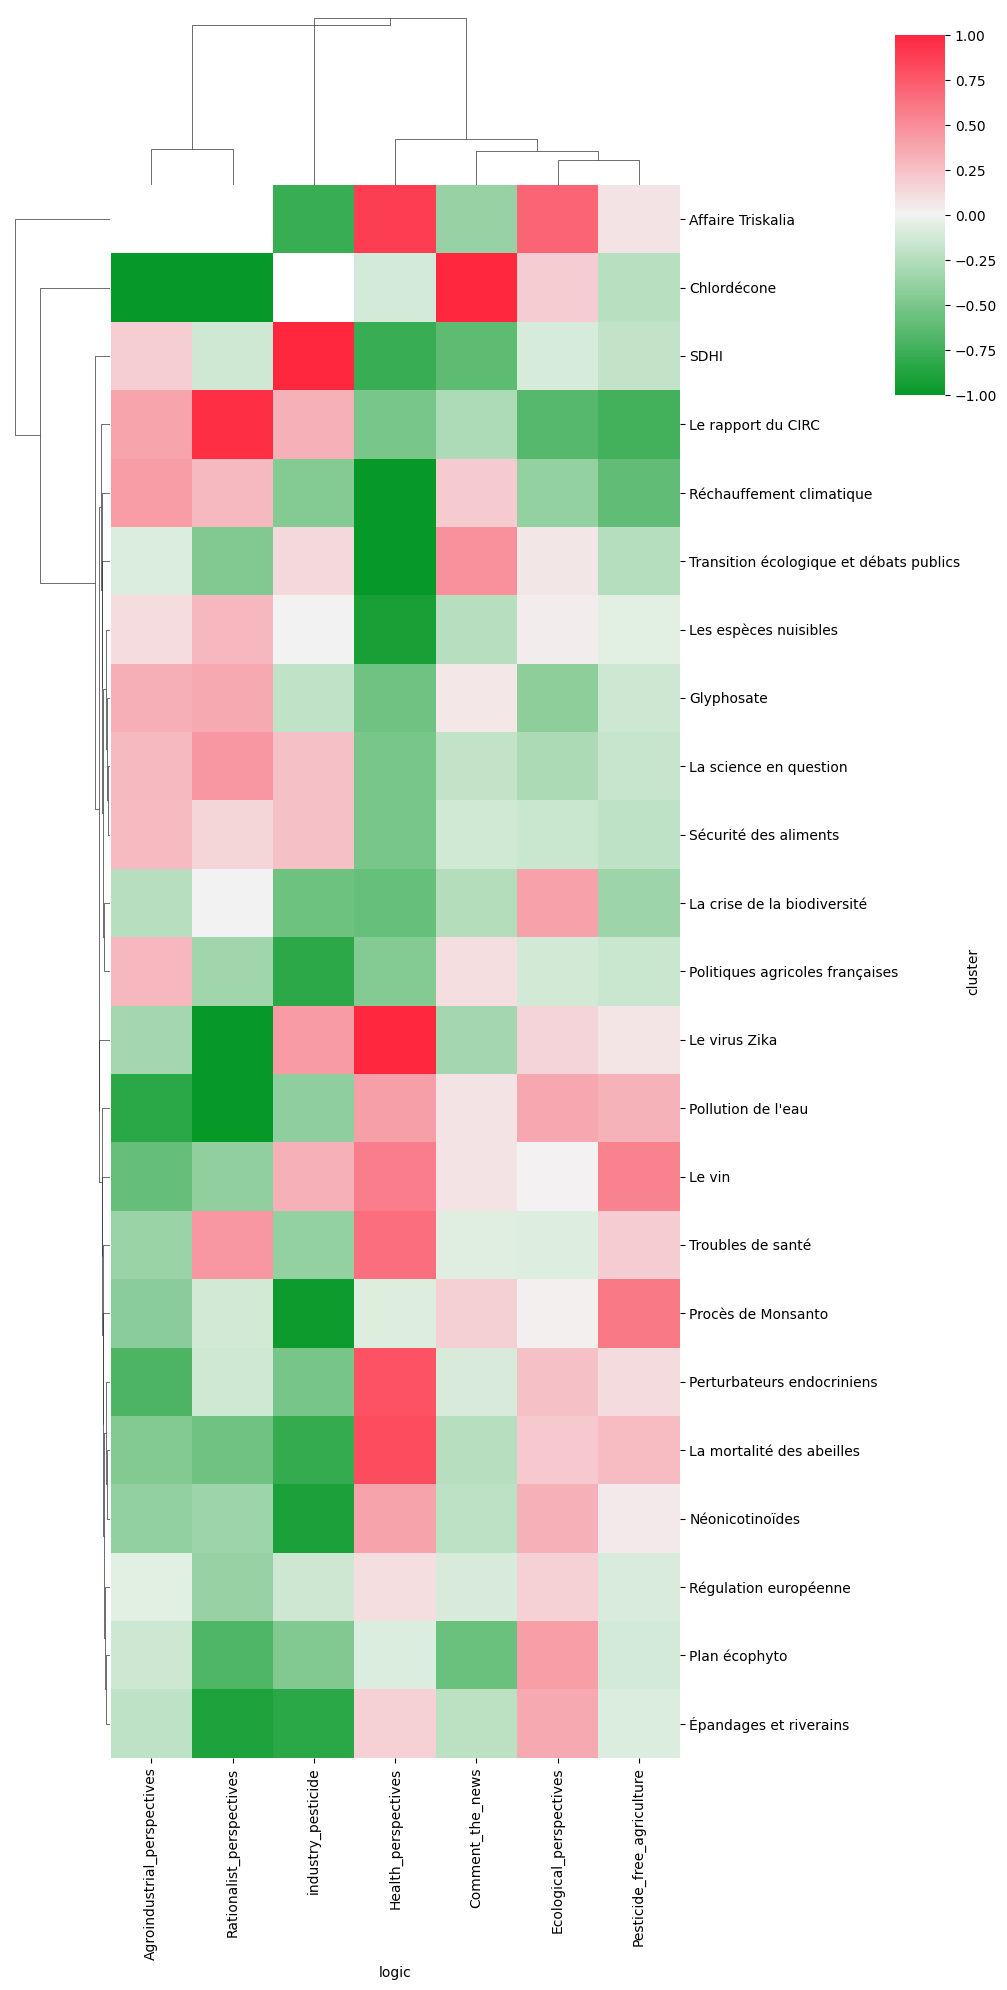

In [76]:
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
divnorm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

fig=sns.clustermap(ct,method="centroid",cmap=rdgn, norm=divnorm,figsize=(10,20), 
                   dendrogram_ratio=(0.15,0.1), cbar_pos= (0.9, 0.8, 0.05, 0.18), mask = ct <= -10.0)

fig

In [79]:
fig.savefig("image/content_analysis/clustermap_topic.png") 


In [82]:
for x in tweets.text.loc[(tweets.logic=="industry_pesticide") & (tweets.text.str.lower().str.contains("sdhi"))]:
    print('########\n', x)

########
 Toutes les sdhi ne se valent pas non plus!🤔
⤵️
Témoin
#Xemium
Ref sdhi
Au passage ca marche très bien!👍

Vous voyez où je veux en venir ou pas?😉
#ceuxquifontlesessais
#fragtw
2/3 https://twitter.com/Pat2816/status/1403375112188014596/photo/1
########
 Et tout ne se vaut pas en matière de protection contre le #sclerorinia en 1 passage 🤔
Temoin/ sdhi+ strob/ ref sdhi+ triazole ⤵️
Quand c'est jaune, c'est pris par la maladie.😉
#ceuxquifontlesessais 
#FrAgTw 
2/3 https://twitter.com/Pat2816/status/1403006364943896579/photo/1
########
 🤔 agroécologiquement et techniquement parlant, dans un programme de #protectionfongicide des 
#orges de printemps en semis d'automne, vaut-il mieux:
1- utiliser 50gr de SDHI en TS
Ou
2- intervenir en foliaire avec 100 gr de SDHI
...
#ceuxquifontlesessais https://twitter.com/Pat2816/status/1392520610325180416/photo/1
########
 @laurentgantner @allore_d Aucun lien avec le sujet des SDHI! Les bons # sont #cuivre #neem... pesticides utilisés en #bio
###

In [83]:
import numpy as np
import re
import scipy
import statsmodels as sm
import statsmodels.stats
import statsmodels.stats.proportion

import statsmodels.api as sm
statsmodels.__version__

'0.14.6'

In [84]:
list_nb_cluster = []
dict_nb_cluster = {}

log_or = []
log_upper = []
log_lower = []
world = []
list_theme = []

for x in list_column:
    nb_indus = np.sum(d1_industry[x])
    nb_indus_other_clust = np.sum(d1_industry["somme"]) - nb_indus
    nb_total = np.sum(d1[x])
    nb_other = nb_total - nb_indus
    nb_total_other = np.sum(d1["somme"]) - np.sum(d1_industry["somme"])
    nb_other_clust = nb_total_other - nb_other
    list_nb_cluster.append(nb_indus)
    #dict_nb_cluster[x] = {"indus": int(nb_indus), "non-indus":int(nb_other), "total":int(nb_total)}
    arr = np.array([[nb_indus, nb_indus_other_clust], 
                        [nb_other, nb_other_clust]])
    #print(arr)
        
    if 1:
                   table=statsmodels.stats.contingency_tables.Table2x2(arr)


                   logodd=table.log_oddsratio
                   [logodd_minus,logodd_plus]=table.log_oddsratio_confint(.95)
                   #print (logodd_minus,logodd_plus)
                   deviation=logodd
                   deviation_upper=logodd_plus
                   deviation_lower=logodd_minus
    log_or.append(deviation)
    log_upper.append(logodd_plus)
    log_lower.append(logodd_minus)
    list_theme.append(x)
    

    
#dict_nb_cluster

In [85]:
data = {"theme":list_theme,"nb":list_nb_cluster,"log_or":log_or,"log_upper": log_upper, "log_lower":log_lower}
logor = pd.DataFrame(data).sort_values(["log_or"], ascending= True)
logor

,theme,nb,log_or,log_upper,log_lower
9,Chlordécone,0,-4.656988,-4.568292,-4.745684
12,Procès de Monsanto,84,-0.846841,-0.839881,-0.853801
11,Néonicotinoïdes,118,-0.800937,-0.795032,-0.806842
3,Épandages et riverains,29,-0.687593,-0.675840,-0.699346
10,La mortalité des abeilles,136,-0.676833,-0.671314,-0.682352
14,Politiques agricoles françaises,39,-0.675876,-0.665725,-0.686027
6,Affaire Triskalia,2,-0.597953,-0.553363,-0.642543
15,La crise de la biodiversité,58,-0.382746,-0.374384,-0.391108
16,Perturbateurs endocriniens,25,-0.348127,-0.335452,-0.360802
1,Plan écophyto,6,-0.320510,-0.294706,-0.346313


In [86]:
import seaborn as sns

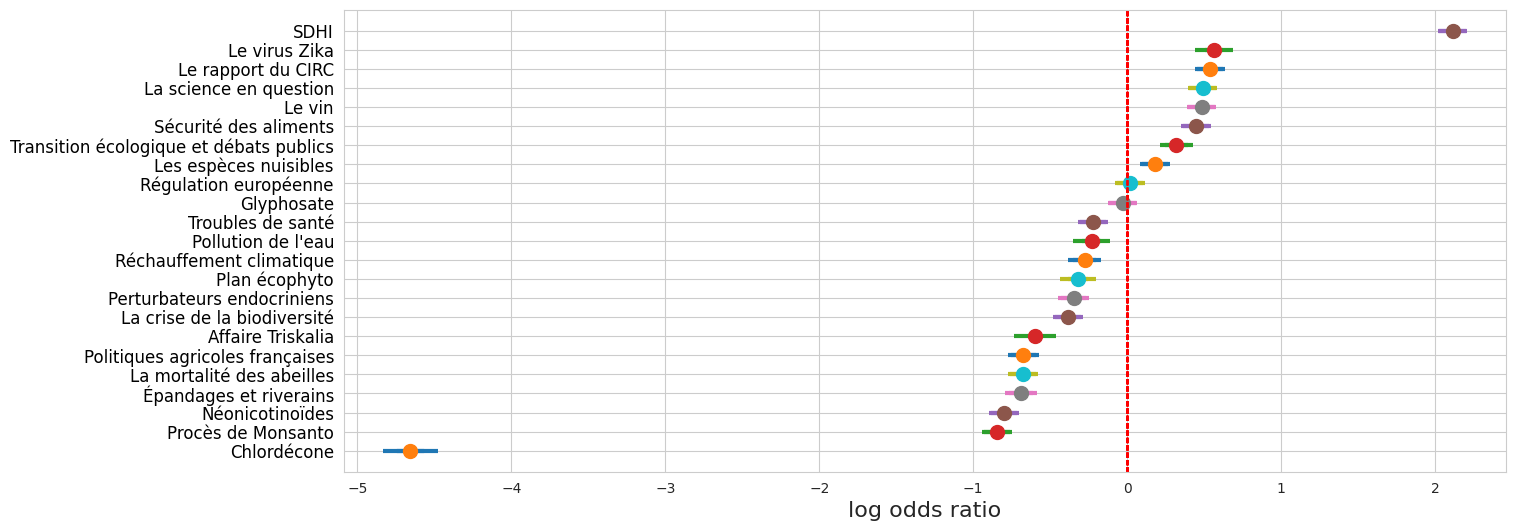

In [87]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, figsize=(15,6), sharey = True, sharex=False)
#ax.set_xscale("log")

for n, i in enumerate(logor.theme):
        y = [i, i]
        x = [logor["log_lower"].iloc[n], logor["log_upper"].iloc[n]]

        ax.plot(x, y, "_-", markersize = 20, #color=couleur, 
                    markeredgewidth= 3, linewidth = 3)

        y = i
        x = logor["log_or"].iloc[n]
        ax.plot(x, y, "o", #color=couleur,
                markersize = 10)
        ax.yaxis.set_tick_params(labelcolor="black", labelsize=12)
        #ax.set_title(j, fontsize=14, fontweight='bold')
        ax.axvline(0, ls='--', linewidth=1, color='red')
        ax.set_xlabel("log odds ratio", fontsize=16)
        ax.set_ylabel("", fontsize=16)


In [119]:
freq_all

,level_0,index,logic,global,cluster,nb,local,zscore
0,0,0,Agroindustrial_perspectives,0.270343,Chlordécone,68,0.025925,-2.344504
1,1,1,Comment_the_news,0.147038,Chlordécone,1161,0.442623,1.102031
2,2,2,Ecological_perspectives,0.314515,Chlordécone,998,0.380480,0.190403
3,3,3,Health_perspectives,0.056991,Chlordécone,133,0.050705,-0.116862
4,4,4,Pesticide_free_agriculture,0.107418,Chlordécone,224,0.085398,-0.229404
...,...,...,...,...,...,...,...,...
156,156,156,Ecological_perspectives,0.314515,Troubles de santé,2119,0.292478,-0.072644
157,157,157,Health_perspectives,0.056991,Troubles de santé,793,0.109455,0.652619
158,158,158,Pesticide_free_agriculture,0.107418,Troubles de santé,944,0.130297,0.193083
159,159,159,Rationalist_perspectives,0.080589,Troubles de santé,914,0.126156,0.448161


In [126]:
f = freq_all_cleaned.loc[freq_all_cleaned.logic=="industry_pesticide"]#.replace(-10.0, -np.inf)#.sort_values('zscore', ascending=False)
nb_cluster = dict(zip(freq_all_cleaned.cluster, freq_all_cleaned.nb))
logor["zscore"] = logor.theme.map(nb_cluster.get)



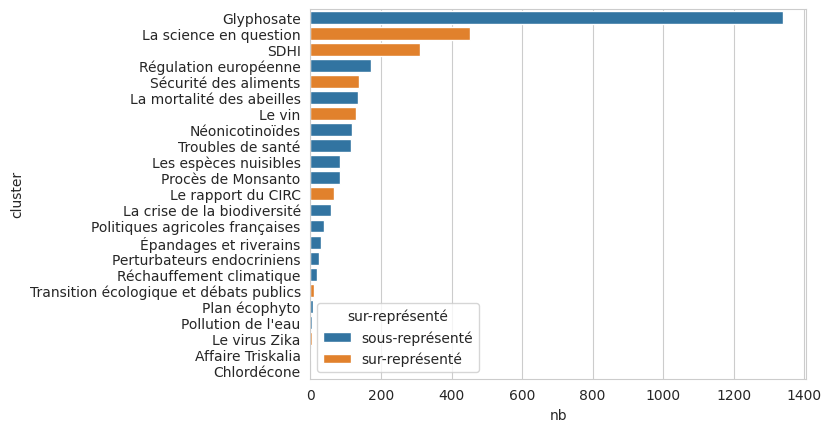

In [135]:
sns.set_style("whitegrid")
f.loc[f.zscore < 0, "sur-représenté"] = "sous-représenté"
f.loc[f.zscore > 0, "sur-représenté"] = "sur-représenté"
fig = sns.barplot(f.sort_values("nb", ascending = False), x = "nb", y = "cluster", hue = "sur-représenté")

In [ ]:
d2 = d.loc[(d.somme>0) & ~(d.logic.isna())]
d2_industry = d2.loc[d2.industry==True]
list_nb_cluster = []
dict_nb_cluster = {}

log_or = []
log_upper = []
log_lower = []
world = []
list_theme = []

for x in list_column:
    nb_indus = np.sum(d2_industry[x])
    nb_indus_other_clust = np.sum(d2_industry["somme"]) - nb_indus
    nb_total = np.sum(d2[x])
    nb_other = nb_total - nb_indus
    nb_total_other = np.sum(d2["somme"]) - np.sum(d2_industry["somme"])
    nb_other_clust = nb_total_other - nb_other
    list_nb_cluster.append(nb_indus)
    #dict_nb_cluster[x] = {"indus": int(nb_indus), "non-indus":int(nb_other), "total":int(nb_total)}
    arr = np.array([[nb_indus, nb_indus_other_clust], 
                        [nb_other, nb_other_clust]])
    #print(arr)
        
    if 1:
                   table=statsmodels.stats.contingency_tables.Table2x2(arr)


                   logodd=table.log_oddsratio
                   [logodd_minus,logodd_plus]=table.log_oddsratio_confint(.95)
                   #print (logodd_minus,logodd_plus)
                   deviation=logodd
                   deviation_upper=logodd_plus
                   deviation_lower=logodd_minus
    log_or.append(deviation)
    log_upper.append(logodd_plus)
    log_lower.append(logodd_minus)
    list_theme.append(x)
    

    
#dict_nb_cluster

In [ ]:
data = {"theme":list_theme,"nb":list_nb_cluster,"log_or":log_or,"log_upper": log_upper, "log_lower":log_lower}
logor = pd.DataFrame(data).sort_values(["log_or"], ascending= True)

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, figsize=(15,6), sharey = True, sharex=False)
#ax.set_xscale("log")

for n, i in enumerate(logor.theme):
        y = [i, i]
        x = [logor["log_lower"].iloc[n], logor["log_upper"].iloc[n]]

        ax.plot(x, y, "_-", markersize = 20, #color=couleur, 
                    markeredgewidth= 3, linewidth = 3)

        y = i
        x = logor["log_or"].iloc[n]
        ax.plot(x, y, "o", #color=couleur,
                markersize = 10)
        ax.yaxis.set_tick_params(labelcolor="black", labelsize=12)
        #ax.set_title(j, fontsize=14, fontweight='bold')
        ax.axvline(0, ls='--', linewidth=1, color='red')
        ax.set_xlabel("log odds ratio", fontsize=16)
        ax.set_ylabel("", fontsize=16)

In [ ]:
d.logic.unique()

In [ ]:
#d2 = d.loc[(d.somme>0) & ~(d.logic.isna())]
d2_agroind = d2.loc[d2.logic=='Pesticide_free_agriculture']
list_nb_cluster = []
dict_nb_cluster = {}

log_or = []
log_upper = []
log_lower = []
world = []
list_theme = []

for x in list_column:
    nb_indus = np.sum(d2_agroind[x])
    nb_indus_other_clust = np.sum(d2_agroind["somme"]) - nb_indus
    nb_total = np.sum(d2[x])
    nb_other = nb_total - nb_indus
    nb_total_other = np.sum(d2["somme"]) - np.sum(d2_agroind["somme"])
    nb_other_clust = nb_total_other - nb_other
    list_nb_cluster.append(nb_indus)
    #dict_nb_cluster[x] = {"indus": int(nb_indus), "non-indus":int(nb_other), "total":int(nb_total)}
    arr = np.array([[nb_indus, nb_indus_other_clust], 
                        [nb_other, nb_other_clust]])
    #print(arr)
        
    if 1:
                   table=statsmodels.stats.contingency_tables.Table2x2(arr)


                   logodd=table.log_oddsratio
                   [logodd_minus,logodd_plus]=table.log_oddsratio_confint(.95)
                   #print (logodd_minus,logodd_plus)
                   deviation=logodd
                   deviation_upper=logodd_plus
                   deviation_lower=logodd_minus
    log_or.append(deviation)
    log_upper.append(logodd_plus)
    log_lower.append(logodd_minus)
    list_theme.append(x)

In [ ]:
data = {"theme":list_theme,"nb":list_nb_cluster,"log_or":log_or,"log_upper": log_upper, "log_lower":log_lower}
logor = pd.DataFrame(data).sort_values(["log_or"], ascending= True)

sns.set_style("whitegrid")
fig, ax = plt.subplots(1, figsize=(15,6), sharey = True, sharex=False)
#ax.set_xscale("log")

for n, i in enumerate(logor.theme):
        y = [i, i]
        x = [logor["log_lower"].iloc[n], logor["log_upper"].iloc[n]]

        ax.plot(x, y, "_-", markersize = 20, #color=couleur, 
                    markeredgewidth= 3, linewidth = 3)

        y = i
        x = logor["log_or"].iloc[n]
        ax.plot(x, y, "o", #color=couleur,
                markersize = 10)
        ax.yaxis.set_tick_params(labelcolor="black", labelsize=12)
        #ax.set_title(j, fontsize=14, fontweight='bold')
        ax.axvline(0, ls='--', linewidth=1, color='red')
        ax.set_xlabel("log odds ratio", fontsize=16)
        ax.set_ylabel("", fontsize=16)